In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
split_file_paths = ['https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_1.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_2.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_3.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_4.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_5.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_6.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_7.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_8.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_9.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_10.csv']

MP_bandgap = pd.concat([pd.read_csv(file) for file in split_file_paths])

In [3]:
MP_bandgap.drop(['Index', 'Formula', 'mp-id'], axis=1, inplace = True)

In [4]:
from pycaret.regression import *

In [5]:
s = setup(MP_bandgap, target='bandgap', session_id = 0, index=False)

,Description,Value
0,Session id,0
1,Target,bandgap
2,Target type,Regression
3,Original data shape,"(1547108, 148)"
4,Transformed data shape,"(1547108, 148)"
5,Transformed train set shape,"(1082975, 148)"
6,Transformed test set shape,"(464133, 148)"
7,Numeric features,147
8,Rows with missing values,0.0%
9,Preprocess,True


In [8]:
best = compare_models(include = ['lr', 'dt', 'rf', 'lightgbm'], cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.2105,2.2500,1.5000,0.0062,0.6501,14.5489,14.0200
lr,Linear Regression,1.2114,2.2532,1.5011,0.0048,0.6505,14.6430,10.1800
rf,Random Forest Regressor,1.2585,2.6003,1.6126,-0.1485,0.7003,13.7170,1883.1100
dt,Decision Tree Regressor,1.2589,2.6022,1.6131,-0.1494,0.7008,13.7341,183.2900


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

In [9]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

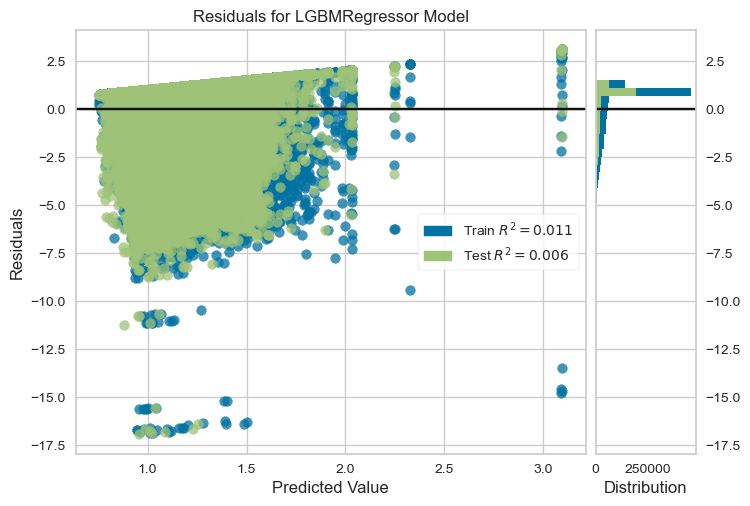

In [10]:
plot_model(best, plot='residuals')

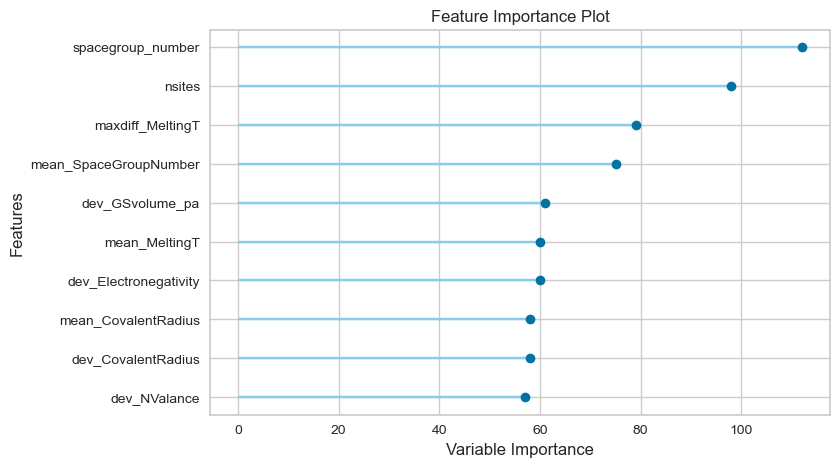

In [11]:
plot_model(best, plot = 'feature')

In [12]:
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.2105,2.2500,1.5000,0.0062,0.6501,14.5489


### Save model

In [13]:
save_model(best, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\rlawn\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['nsites', 'spacegroup_number',
                                              'NComp', 'Comp_L2Norm',
                                              'Comp_L3Norm', 'Comp_L5Norm',
                                              'Comp_L7Norm', 'Comp_L10Norm',
                                              'mean_Number', 'maxdiff_Number',
                                              'dev_Number', 'max_Number',
                                              'min_Number', 'most_Number',
                                              'mean_MendeleevNumber',
                                              '...
                                              'maxdiff_AtomicWeight',
                                              'dev_AtomicWeight',
                                              'max_AtomicWeight',
                              

In [14]:
### Load_model
loaded_model = load_model('best_model')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
lightgbm = create_model('lightgbm')
rf = create_model('rf')
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2077,2.2373,1.4958,0.0054,0.6495,15.2049
1,1.2117,2.2583,1.5028,0.0061,0.6509,13.6723
2,1.2079,2.2435,1.4978,0.0059,0.6498,17.8121
3,1.2096,2.2420,1.4973,0.0055,0.6499,14.8853
4,1.2113,2.2625,1.5042,0.0065,0.6501,14.7501
5,1.2085,2.2398,1.4966,0.0063,0.6493,14.1502
6,1.2155,2.2740,1.5080,0.0062,0.6510,12.0503
7,1.2093,2.2434,1.4978,0.0059,0.6500,15.3760
8,1.2082,2.2459,1.4986,0.0059,0.6504,14.7894


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:39:38
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tune model

tuned_model = tune_model(best, n_iter = 20, optimize = 'MAE')

### Blending model

In [ ]:
blend1 = blend_models(estimator_list = [lightgbm, rf, dt])

In [ ]:
blender2 = blend_models([lightgbm, rf, et], fold = 5)

### Ensemble model

In [ ]:
dt = create_model('dt')

In [ ]:
ensembled_model1 = ensemble_model(dt) #Bagging

In [ ]:
ensembled_model2 = ensemble_model(dt, method='Boosting') #Boosting